<div style="border: 2px solid #255c8a; padding: 10px; background-color: #121212; border-radius: 5px; line-height: 1; width: 97%">
  <strong> ℹ️ Descrição:</strong> 
  Finalmente, temos provavelmente a tarefa mais complicada desta EDA: o tratamento dos dados com NaN`s
</div>

# Inicialização

**Bibliotecas**:

In [28]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Funções Auxiliares:**

In [29]:
sys.path.append(os.path.abspath("../src"))
from AnaliseExploratoria_functions import histogram_and_stats, evaluate_distribution

**Leitura do Arquivo:**

In [30]:
current_path = os.path.dirname(os.getcwd())
csv_path = (current_path + '/Data/campeonatos_futebol_sem_outliers.csv')

df = pd.read_csv(csv_path)

# Análise preliminar dos NaNs

Abaixo, refazemos uma análise feita em "[1] Análise Inicial", em que mostramos a % de NaNs em cada coluna:

In [31]:
nan_percent = df.isna().mean() * 100
print(nan_percent.sort_values(ascending=False))

Tratamentos 2          81.920781
Tratamentos 1          81.920781
Defesas difíceis 2     77.627057
Defesas difíceis 1     77.627057
Tiros-livres 1         77.446193
Tiros-livres 2         77.446193
Contra-ataques 2       77.417254
Contra-ataques 1       77.417254
Chutes bloqueados 1    68.095496
Chutes bloqueados 2    68.095496
Cruzamentos 1          67.469705
Cruzamentos 2          67.469705
Substituições 1        66.058962
Substituições 2        66.058962
Tiro de meta 1         56.654006
Tiro de meta 2         56.654006
Laterais 1             45.263158
Laterais 2             45.263158
Impedimentos 1          9.994574
Impedimentos 2          9.994574
Posse 1(%)              8.486164
Posse 2(%)              8.486164
Escanteios 1            8.381262
Escanteios 2            8.381262
Chutes fora 2           8.374028
Chutes fora 1           8.374028
Faltas 1                8.366793
Faltas 2                8.366793
Position 2              5.888949
Position 1              5.784048
Chutes a g

Da mesma forma, colocamos a matriz de correlação:

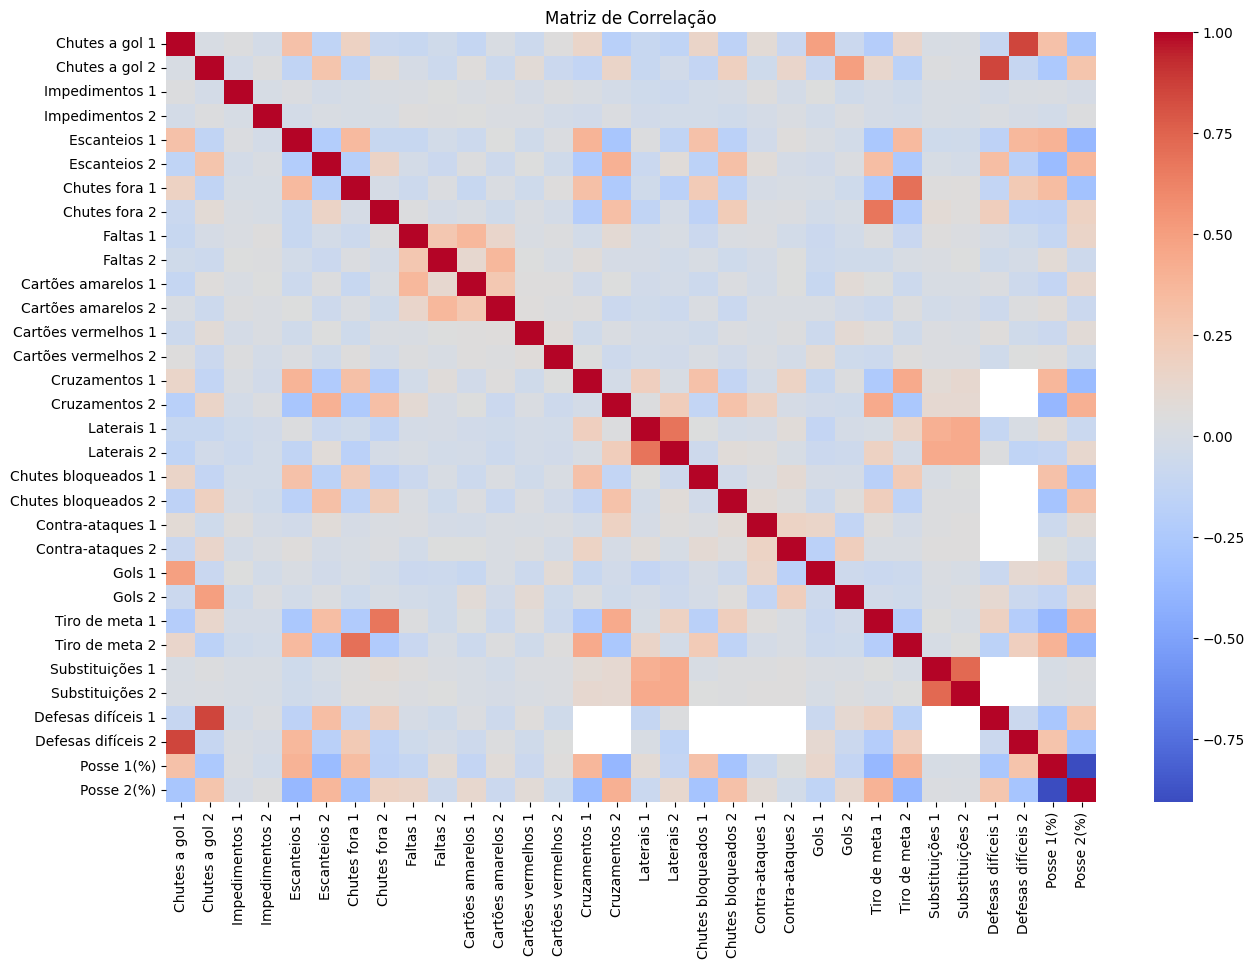

In [32]:
# O grupo combinou de remover as colunas Tiro-livre, Nomes e Tratamentos.
df.drop(columns=['Tiros-livres 1','Tiros-livres 2','Tratamentos 1','Tratamentos 2'],inplace=True)
correlacao = df.select_dtypes(include="number").corr()

# Visualização com heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlacao, annot=False, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

In [33]:
# Pela matriz, vemos que temos muitas colunas com NaN's, além de uma quantidade enorme de variáveis.
# Essa quantidade muito grande de variáveis (grande dimensionalidade) pode tornar os dados ainda mais
# escassos. Além de ocasionar uma redundância nas variáveis. Portanto, vamos primeiro tentar uma abordagem
# de diminuir a dimensionalidade (variáveis).

In [34]:
# Algumas ideias: pegar essas variáveis e transformar em índices. Por exemplo: chute a gol, chute bloqueado, gols e tiro de meta dão um indicador ofensivo.
# indicador defensivo: defesas difíceis e impedimentos podem indicar a força defensiva de cada time.
# indicador de jogadas com bola parada: agrupar laterais, escanteios, cruzamentos e tiros-livres
# indicador de intensidade: posse de bola, position, faltas, cartões amarelos e substituições.

In [35]:
df.columns

Index(['Chutes a gol 1', 'Chutes a gol 2', 'Impedimentos 1', 'Impedimentos 2',
       'Escanteios 1', 'Escanteios 2', 'Chutes fora 1', 'Chutes fora 2',
       'Faltas 1', 'Faltas 2', 'Cartões amarelos 1', 'Cartões amarelos 2',
       'Cartões vermelhos 1', 'Cartões vermelhos 2', 'Cruzamentos 1',
       'Cruzamentos 2', 'Laterais 1', 'Laterais 2', 'Chutes bloqueados 1',
       'Chutes bloqueados 2', 'Contra-ataques 1', 'Contra-ataques 2', 'Gols 1',
       'Gols 2', 'Tiro de meta 1', 'Tiro de meta 2', 'Substituições 1',
       'Substituições 2', 'Defesas difíceis 1', 'Defesas difíceis 2',
       'Posse 1(%)', 'Posse 2(%)', 'Time 1', 'Time 2', 'Position 1',
       'Position 2'],
      dtype='object')

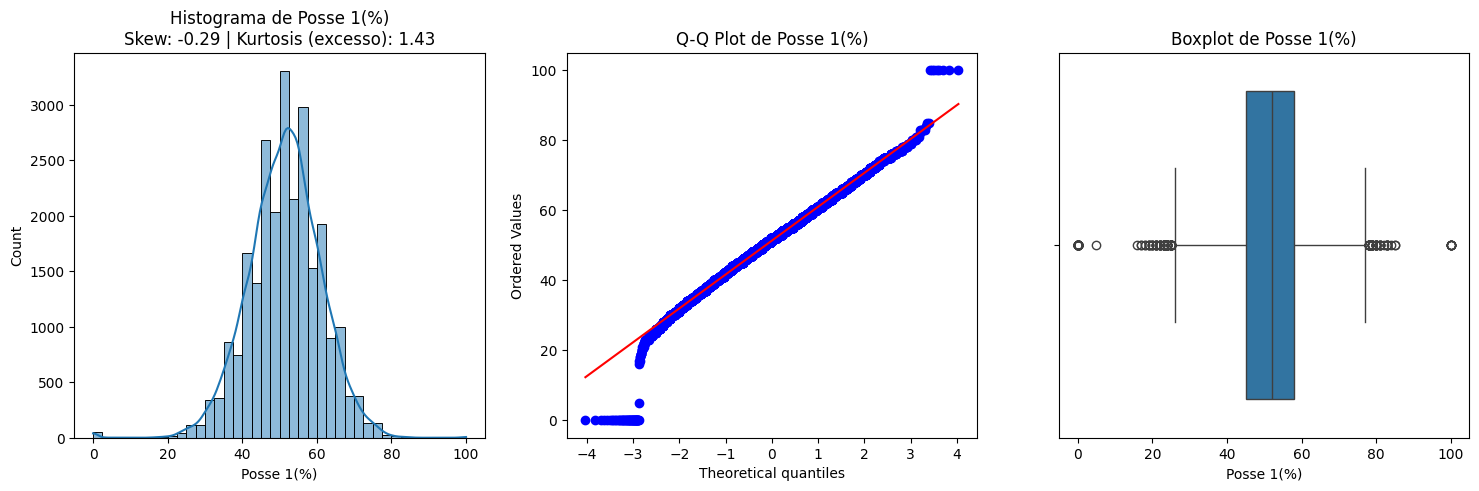


Coluna: Posse 1(%)
Skewness: -0.290
Kurtosis (excesso): 1.427


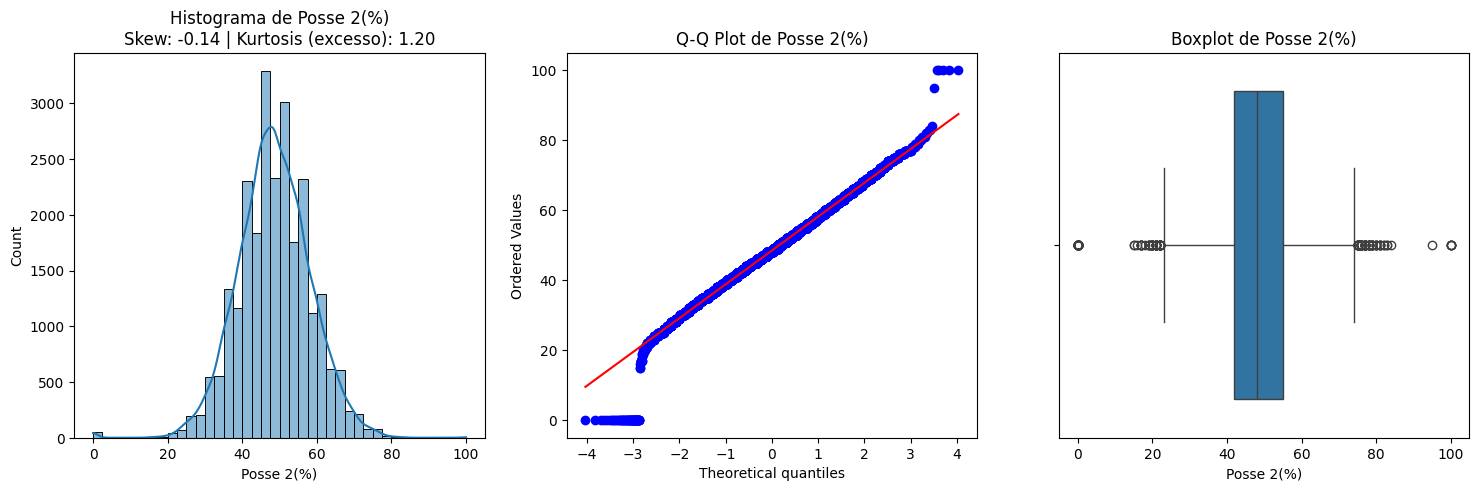


Coluna: Posse 2(%)
Skewness: -0.140
Kurtosis (excesso): 1.198


{'skewness': np.float64(-0.1403062462899591),
 'kurtosis': np.float64(1.1975634908516821)}

In [ ]:
# Antes disso, vamos fazer uma imputação simples por mediana/média nas colunas que possuem poucos NaN's.
# Para isso, vamos avaliar a normalidade da distribuição de algumas variáveis. 

# TODO explicar como ler um gráfico Q-Q

colunas_avaliar = ['Posse 1(%)', 'Posse 2(%)']
# Interpretação:
    # Skewness:
    #   - Se ~0, a distribuição é simétrica.
    #   - Se positivo, a cauda direita é mais longa, indicando assimetria à direita.
    #   - Se negativo, a cauda esquerda é mais longa, indicando assimetria à esquerda.
    #
    # Kurtosis:
    #   - Para uma distribuição normal, o excesso de kurtosis é 0 (pois a kurtosis normal é 3).
    #   - Valores positivos indicam caudas mais pesadas (mais outliers) que uma normal.
    #   - Valores negativos indicam caudas mais leves que uma normal.

evaluate_distribution(df, colunas_avaliar[0],show_boxplot=True)
evaluate_distribution(df, colunas_avaliar[1],show_boxplot=True)


In [37]:
# Skewness indica a concentração de valores nas caudas. Observamos que em ambos os casos, há valores concentrados na cauda direita 
# (skewness negativo).
# Kurtosis mede a tendência de se ter valores extremos. Isso é esperado, já que é perfeitamente possível a posse de bola ser altamente concentrada para um time numa partida. Portanto, o adequado seria fazer uma imputação por mediana, já que é menos afetada por valores extremos.

# NO ENTANTO, pelos gráficos, vemos que mesmo removendo outliers, temos times com posse de bola em 0%. Isso é impossível, e devemos corrigir.
linhas_incorretas = df[(df['Posse 1(%)'] == 0) | (df['Posse 2(%)'] == 0)]
df = df[(df['Posse 1(%)'] != 0) & (df['Posse 2(%)'] != 0)]

# e vamos repetir o teste.

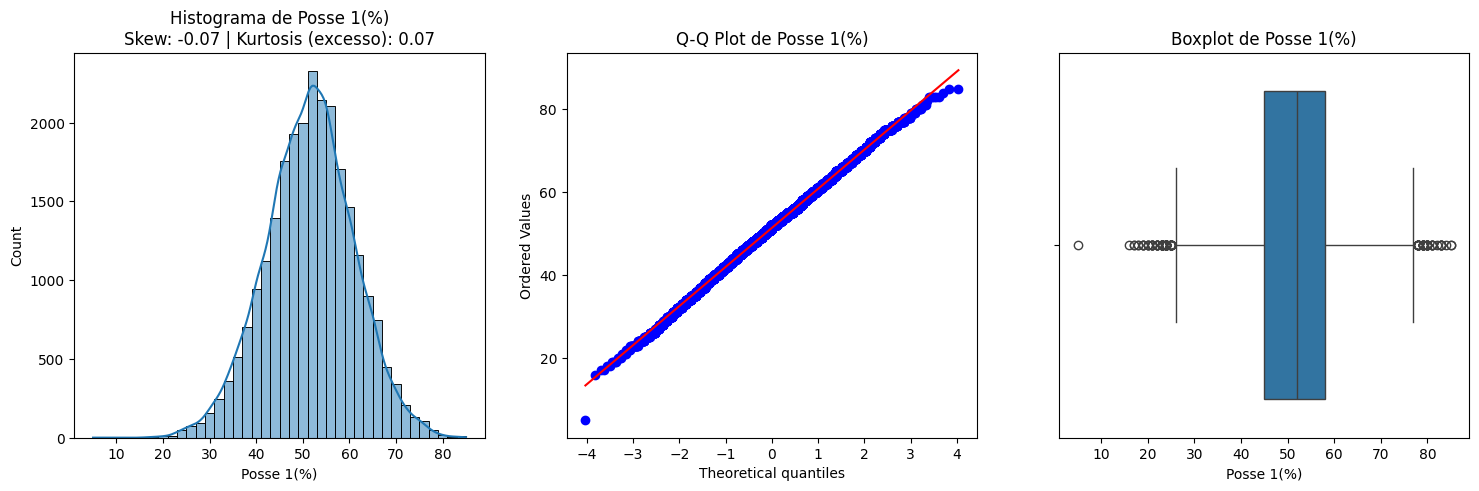


Coluna: Posse 1(%)
Skewness: -0.071
Kurtosis (excesso): 0.070


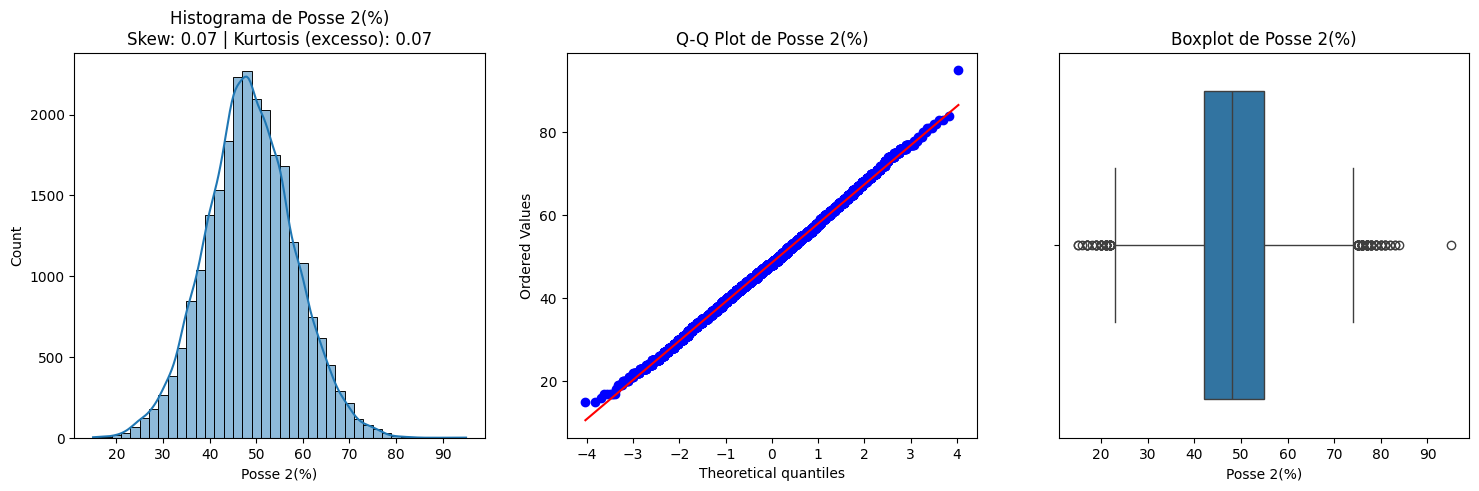


Coluna: Posse 2(%)
Skewness: 0.071
Kurtosis (excesso): 0.071


{'skewness': np.float64(0.07096992007983775),
 'kurtosis': np.float64(0.07050855292312841)}

In [ ]:
evaluate_distribution(df, colunas_avaliar[0],show_boxplot=True)
evaluate_distribution(df, colunas_avaliar[1],show_boxplot=True)

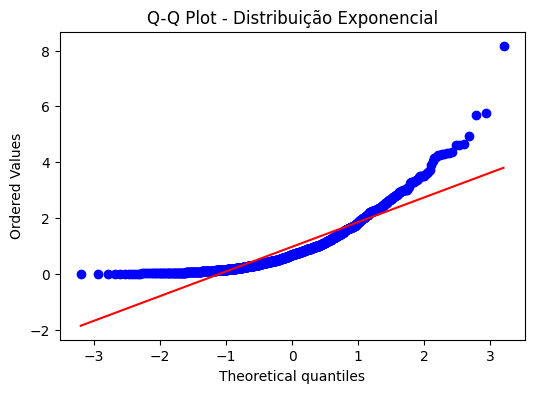

In [39]:
# Obs.: Sobre o gráfico Q-Q, exemplo de uma distribuição exponencial fictícia no gráfico Q-Q, fazendo o teste para verificar se é uma distibuição normal
import numpy as np
from scipy.stats import probplot
np.random.seed(42)
dados_exponenciais = np.random.exponential(scale=1.0, size=1000)

plt.figure(figsize=(6, 4))
probplot(dados_exponenciais, dist="norm", plot=plt)
plt.title('Q-Q Plot - Distribuição Exponencial')
plt.show()

In [40]:
# A distribuição aproxima-se muito de uma normal. Portanto, vamos imputar valores por meio da média nos dados faltantes.
AnaliseExploratoria_functions.impute_missing_values(df, 'Posse 1(%)', strategy='mean')
AnaliseExploratoria_functions.impute_missing_values(df, 'Posse 2(%)', strategy='mean')
df[['Posse 1(%)', 'Posse 2(%)']]

,Posse 1(%),Posse 2(%)
0,77.0,23.0
1,44.0,56.0
2,47.0,53.0
3,27.0,73.0
4,58.0,42.0
...,...,...
27640,52.0,48.0
27641,52.0,48.0
27642,55.0,45.0
27643,45.0,55.0


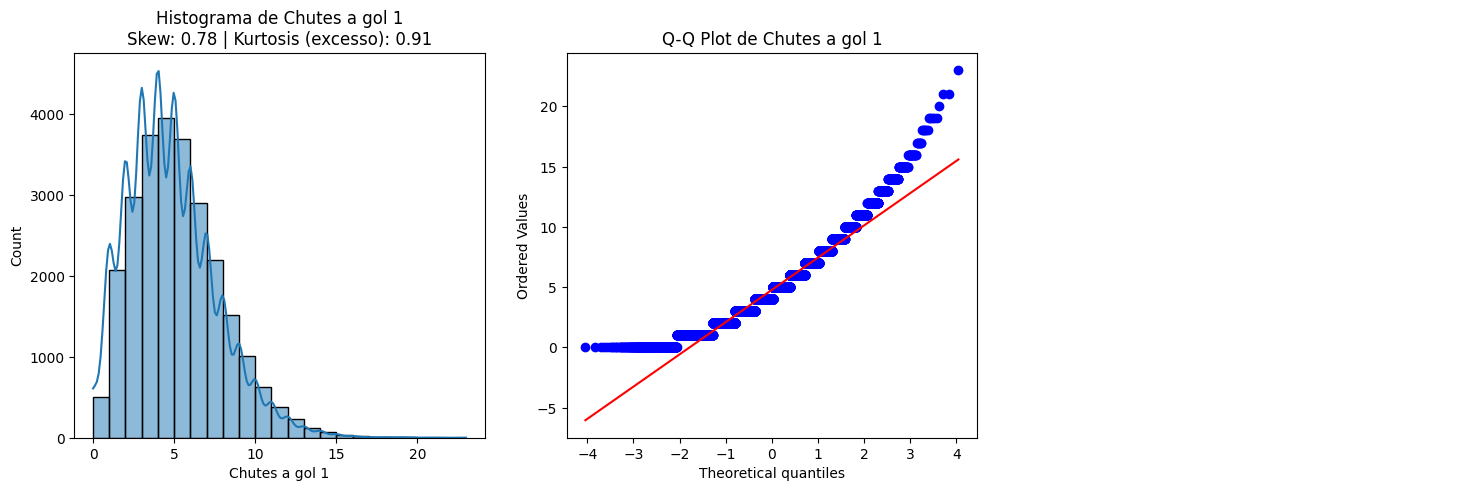


Coluna: Chutes a gol 1
Skewness: 0.784
Kurtosis (excesso): 0.905


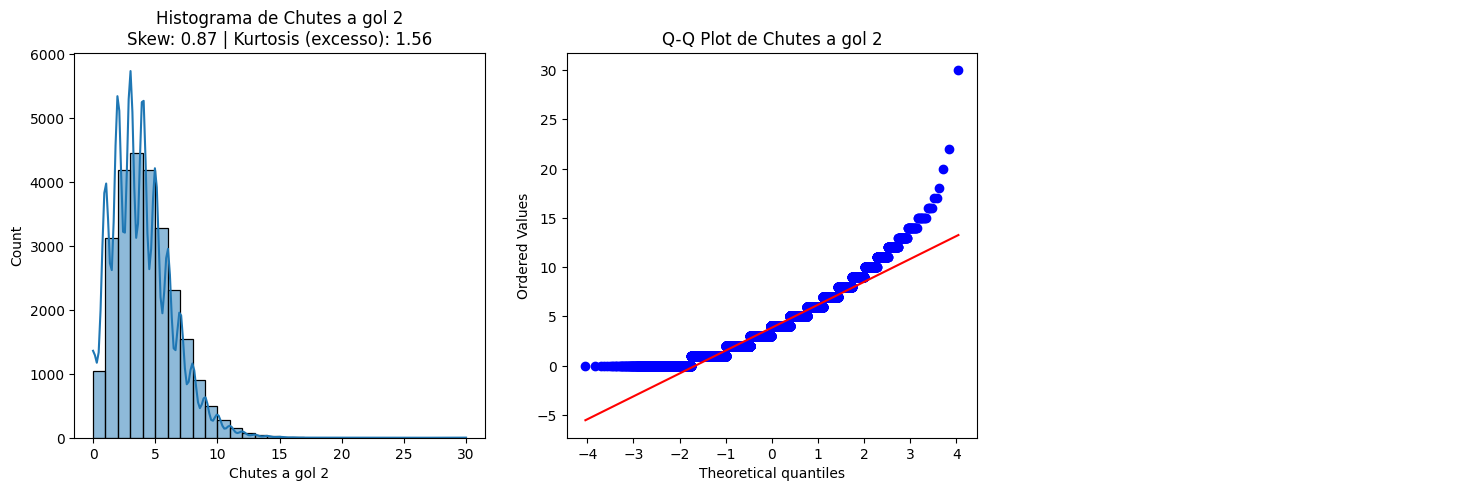


Coluna: Chutes a gol 2
Skewness: 0.870
Kurtosis (excesso): 1.557


{'skewness': np.float64(0.8697923200276007),
 'kurtosis': np.float64(1.5573508787694217)}

In [41]:
# Vamos continuar com as colunas Faltas 1, Faltas 2, Chutes Fora 1, Chutes Fora 2, Escanteios 1, Escanteios 2, Chutes a gol 1, Chutes a gol 2
colunas_avaliar = ['Chutes a gol 1', 'Chutes a gol 2', 'Impedimentos 1', 'Impedimentos 2',
                   'Escanteios 1', 'Escanteios 2', 'Chutes fora 1', 'Chutes fora 2',
                   'Faltas 1', 'Faltas 2' ]

# Chutes a gol 1/2
AnaliseExploratoria_functions.evaluate_distribution(df, colunas_avaliar[0], bins = 23)
AnaliseExploratoria_functions.evaluate_distribution(df, colunas_avaliar[1], bins = 30)

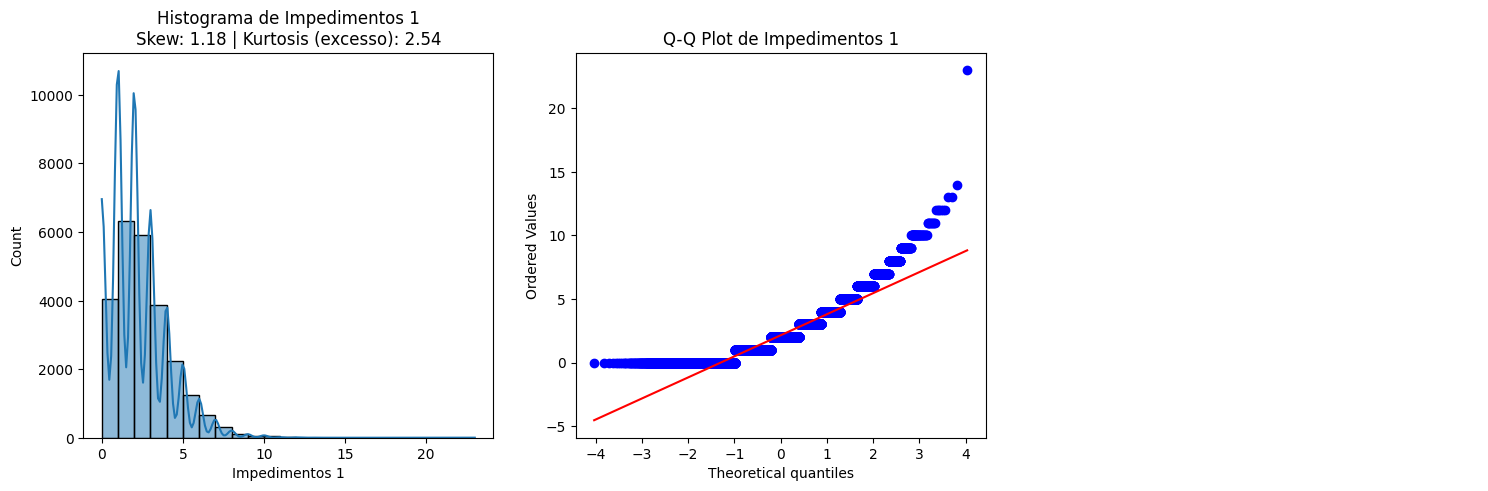


Coluna: Impedimentos 1
Skewness: 1.182
Kurtosis (excesso): 2.540


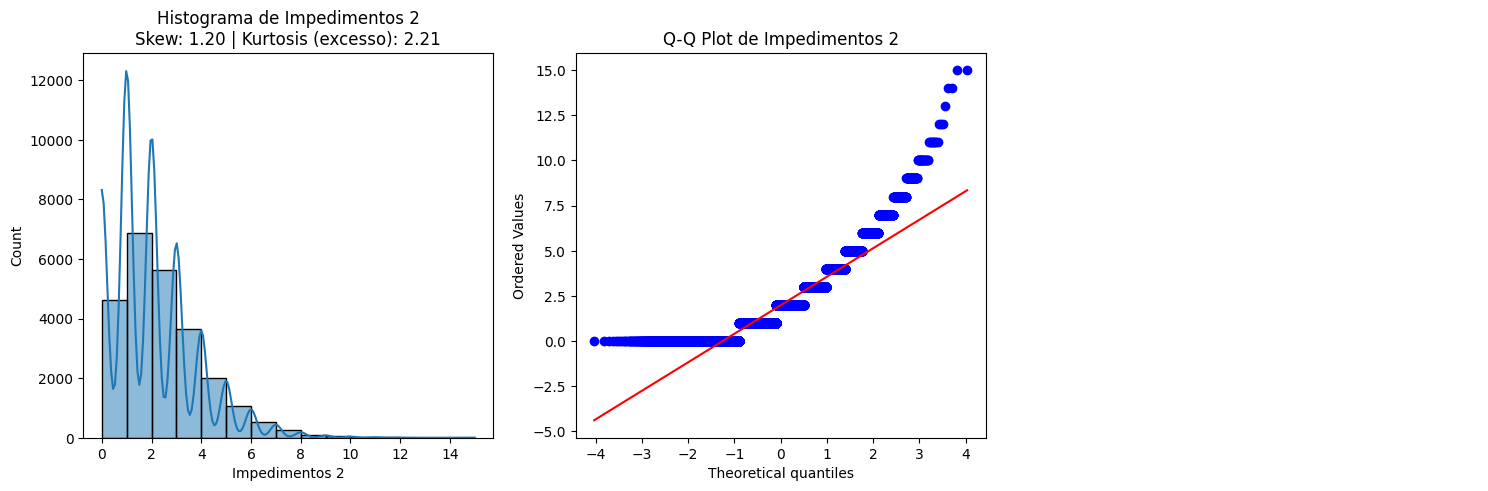


Coluna: Impedimentos 2
Skewness: 1.199
Kurtosis (excesso): 2.209


{'skewness': np.float64(1.1992227646963538),
 'kurtosis': np.float64(2.2094100297758206)}

In [42]:
# Impedimentos 1/2
AnaliseExploratoria_functions.evaluate_distribution(df, colunas_avaliar[2], bins = 23)
AnaliseExploratoria_functions.evaluate_distribution(df, colunas_avaliar[3], bins = 15)

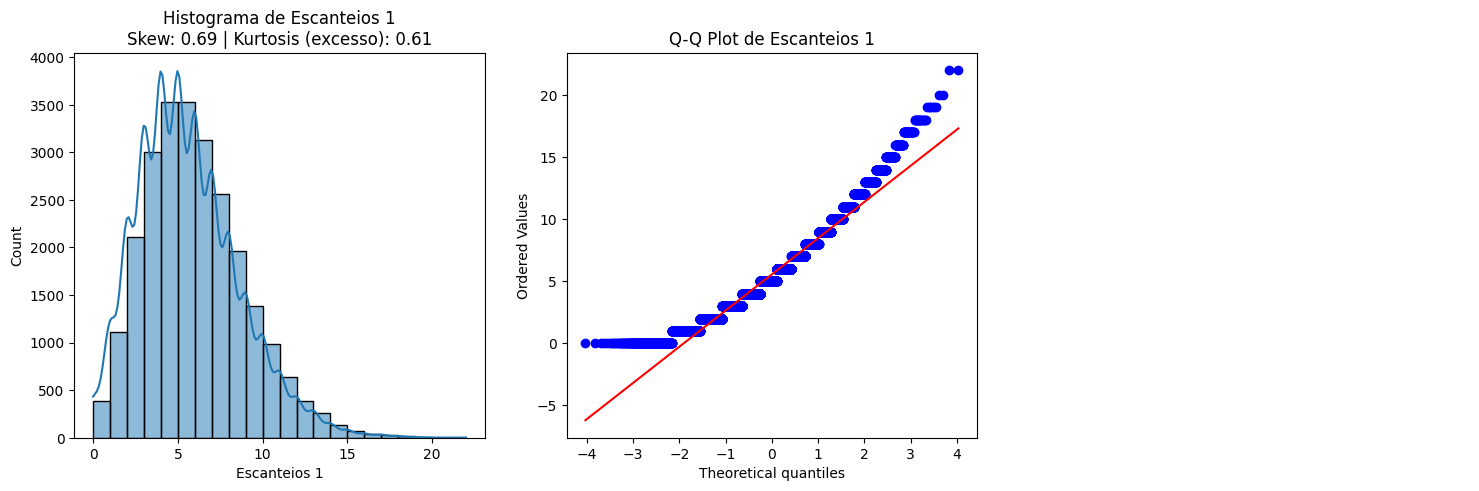


Coluna: Escanteios 1
Skewness: 0.691
Kurtosis (excesso): 0.612


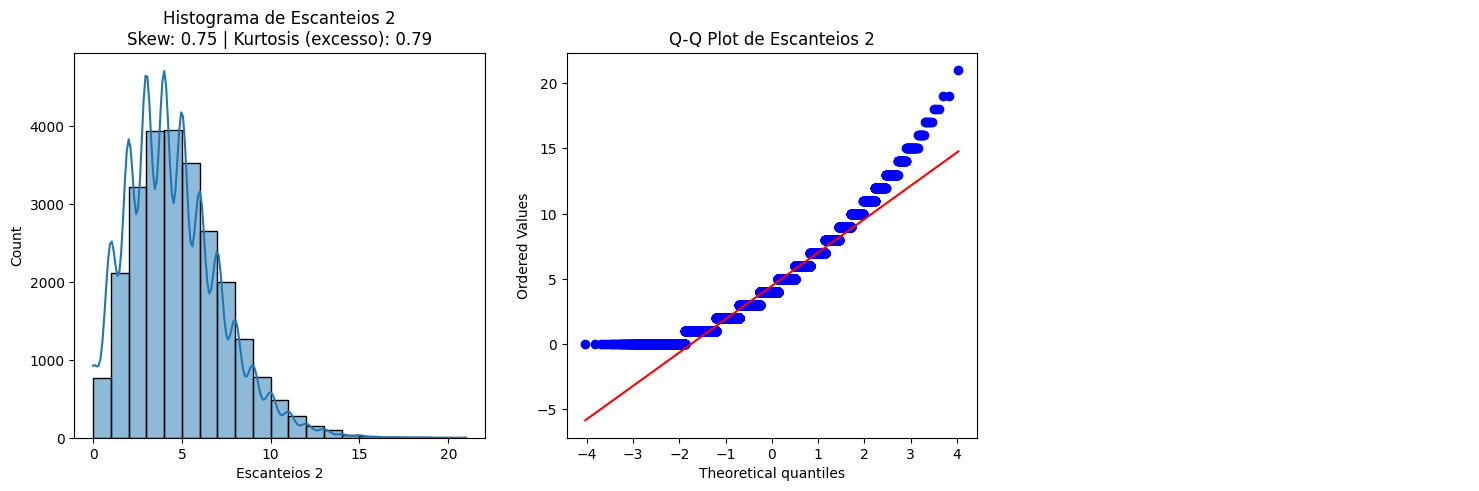


Coluna: Escanteios 2
Skewness: 0.749
Kurtosis (excesso): 0.788


{'skewness': np.float64(0.7489345352615975),
 'kurtosis': np.float64(0.7875329522538341)}

In [43]:
# Escanteios 1/2
AnaliseExploratoria_functions.evaluate_distribution(df, colunas_avaliar[4], bins = 22)
AnaliseExploratoria_functions.evaluate_distribution(df, colunas_avaliar[5], bins = 21)

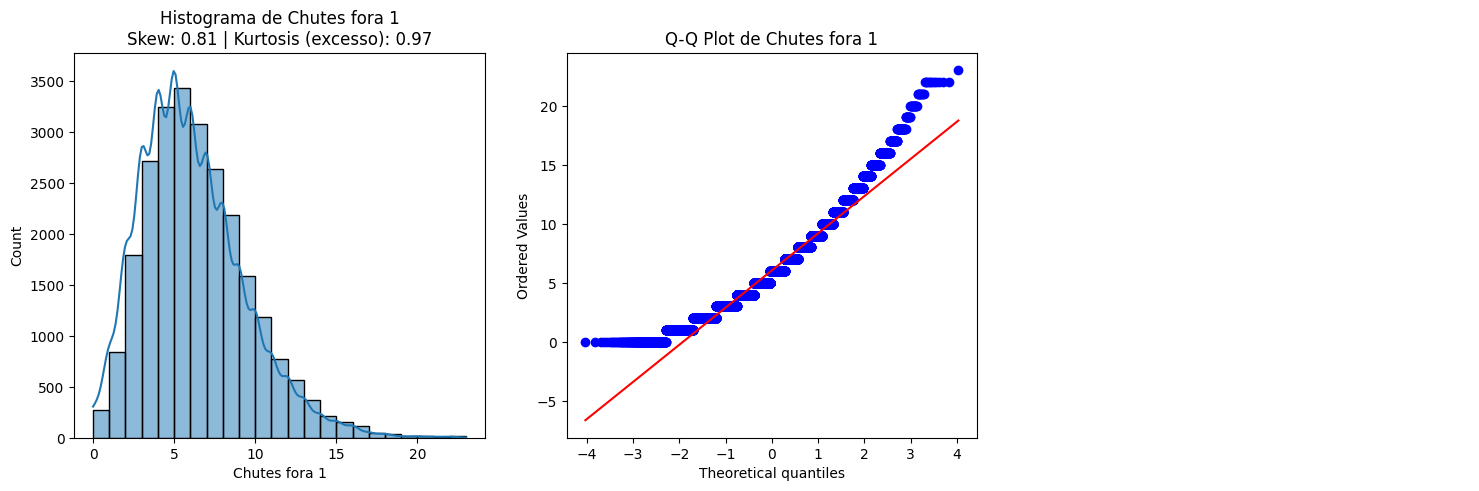


Coluna: Chutes fora 1
Skewness: 0.808
Kurtosis (excesso): 0.970


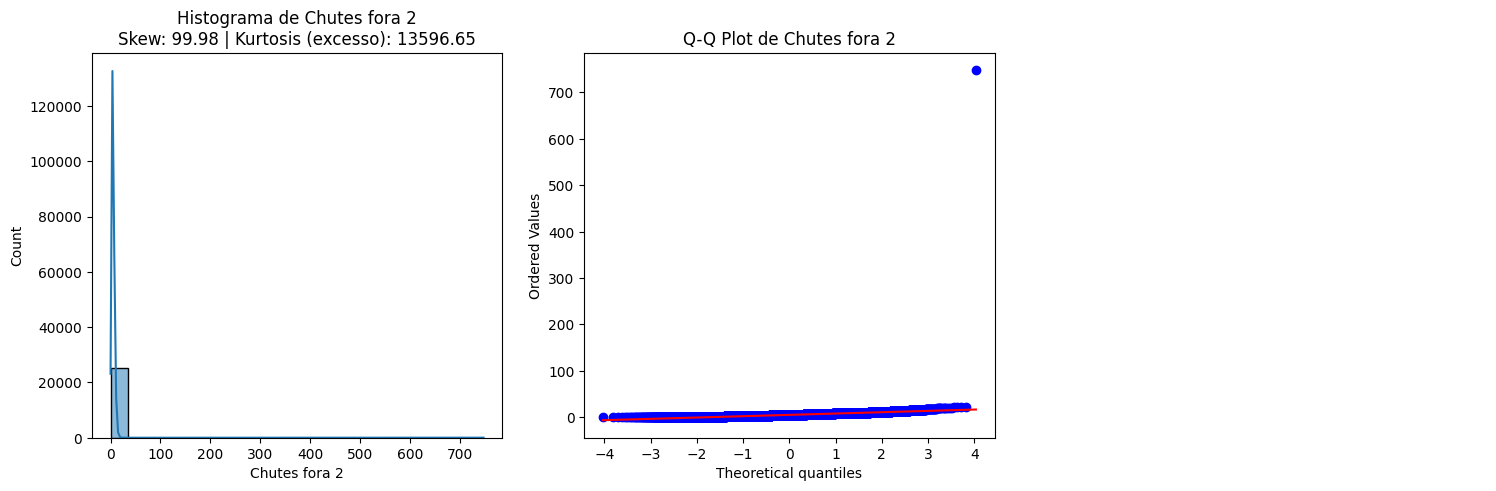


Coluna: Chutes fora 2
Skewness: 99.978
Kurtosis (excesso): 13596.651


{'skewness': np.float64(99.97823790224088),
 'kurtosis': np.float64(13596.651410603896)}

In [44]:
# Chutes fora 1/2
AnaliseExploratoria_functions.evaluate_distribution(df, colunas_avaliar[6], bins = 23)
AnaliseExploratoria_functions.evaluate_distribution(df, colunas_avaliar[7], bins = 21)

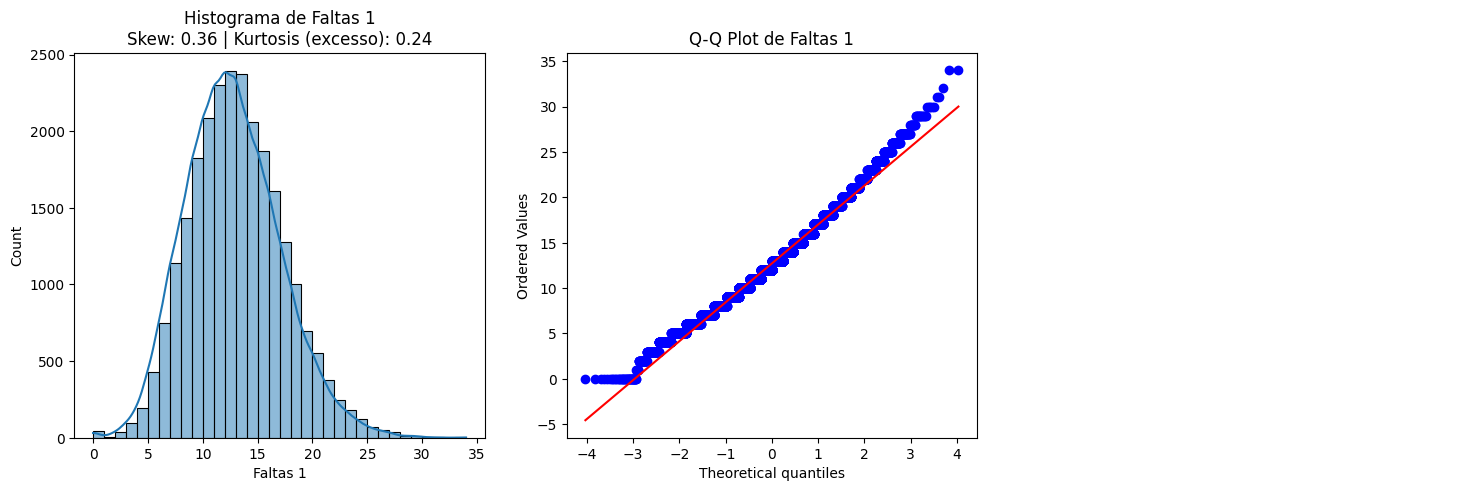


Coluna: Faltas 1
Skewness: 0.359
Kurtosis (excesso): 0.242


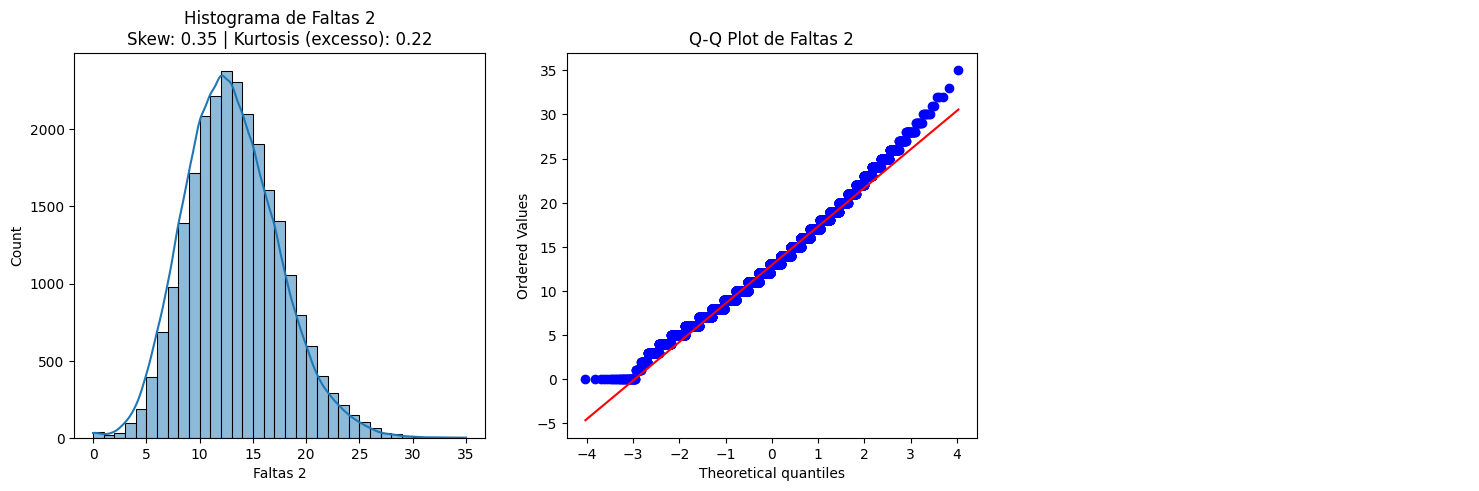


Coluna: Faltas 2
Skewness: 0.346
Kurtosis (excesso): 0.224


{'skewness': np.float64(0.3464990275125146),
 'kurtosis': np.float64(0.22389342557557246)}

In [45]:
# Faltas 1/2
AnaliseExploratoria_functions.evaluate_distribution(df, colunas_avaliar[8], bins = 34)
AnaliseExploratoria_functions.evaluate_distribution(df, colunas_avaliar[9], bins = 35)

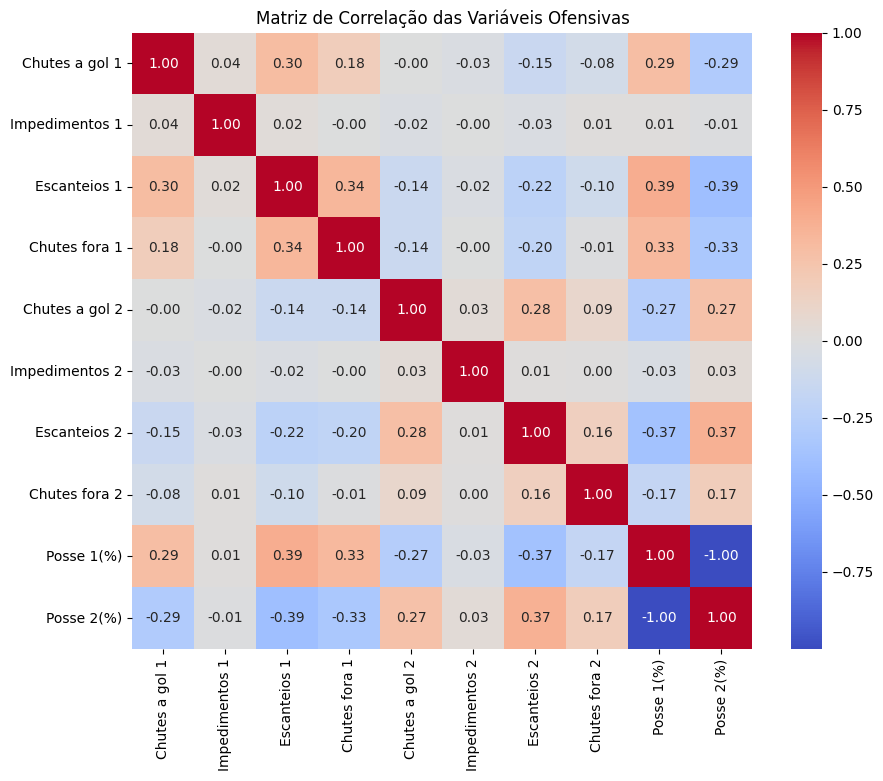

In [46]:
# Vemos que todas essas distribuições não aproximam-se de uma normal e isso faz sentido: uma partida de futebol normalmente tem uma média comum de chutes a gol — no entanto, muitas vezes o time pode atribuir uma postura muito ofensiva e gerar uma distribuição assimétrica com uma cauda pesada.

# Vamos, portanto, tentar criar um índice ofensivo e ver se essas variáveis se comportam de maneira semelhante para ver se contém informações redundantes

colunas_ofensivas = ['Chutes a gol 1','Impedimentos 1', 'Escanteios 1', 'Chutes fora 1','Chutes a gol 2','Impedimentos 2', 'Escanteios 2', 'Chutes fora 2', 'Posse 1(%)','Posse 2(%)']

corr_matrix = df[colunas_ofensivas].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Ofensivas")
plt.show()

In [47]:
# Vamos, portanto, padronizar as variáveis ofensivas, utilizar o KNN inputer nelas, e criar um índice ofensivo.
#TODO: utilizar as funções em AnaliseExploratoria_functions.py para isso

